In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np

In [3]:
from nltk.stem import PorterStemmer

In [61]:
modi_data = pd.read_csv("narendramodi_tweets.csv")
modi_data.head(1422)

id  retweets_count  favorite_count           created_at  \
0     8.263846e+17          1406.0          4903.0  2017-01-31 11:00:07   
1     8.263843e+17           907.0          2877.0  2017-01-31 10:59:12   
2     8.263827e+17           694.0             0.0  2017-01-31 10:52:33   
3     8.263826e+17           666.0             0.0  2017-01-31 10:52:22   
4     8.263826e+17           716.0             0.0  2017-01-31 10:52:16   
5     8.263826e+17           659.0             0.0  2017-01-31 10:52:09   
6     8.263824e+17           498.0             0.0  2017-01-31 10:51:25   
7     8.263823e+17           508.0             0.0  2017-01-31 10:51:18   
8     8.263823e+17           460.0             0.0  2017-01-31 10:51:08   
9     8.263822e+17           389.0             0.0  2017-01-31 10:50:55   
10    8.263822e+17           485.0             0.0  2017-01-31 10:50:40   
11    8.263822e+17           535.0             0.0  2017-01-31 10:50:37   
12    8.263821e+17           541.0             0.0  2017-01-31 10:50:30   
13    8.263821e+17           441.0             0.0  2017-01-31 10:50:26   
14    8.263821e+17           638.0             0.0  2017-01-31 10:50:15   
15    8.263821e+17           423.0             0.0  2017-01-31 10:50:09   
16    8.263820e+17           485.0             0.0  2017-01-31 10:50:00   
17    8.263820e+17           385.0             0.0  2017-01-31 10:49:55   
18    8.263820e+17           493.0             0.0  2017-01-31 10:49:52   
19    8.263820e+17           479.0             0.0  2017-01-31 10:49:47   
20    8.262644e+17          1308.0          4571.0  2017-01-31 03:02:47   
21    8.262642e+17          1416.0          5682.0  2017-01-31 03:01:45   
22    8.262640e+17           943.0          3542.0  2017-01-31 03:00:52   
23    8.262638e+17          1017.0          3830.0  2017-01-31 03:00:08   
24    8.260763e+17          1809.0          9363.0  2017-01-30 14:35:11   
25    8.258765e+17          3286.0         14138.0  2017-01-30 01:21:15   
26    8.257290e+17          2756.0         12247.0  2017-01-29 15:35:19   
27    8.256408e+17          1662.0          6620.0  2017-01-29 09:44:46   
28    8.256407e+17          1370.0          4614.0  2017-01-29 09:44:10   
29    8.256405e+17          1515.0          5030.0  2017-01-29 09:43:24   
...            ...             ...             ...                  ...   
1392  7.726847e+17          1207.0          4307.0  2016-09-05 06:35:56   
1393  7.726845e+17          1014.0          3927.0  2016-09-05 06:35:14   
1394  7.726837e+17          1543.0          5488.0  2016-09-05 06:32:15   
1395  7.726836e+17          1108.0          3407.0  2016-09-05 06:31:39   
1396  7.726827e+17          1157.0          4312.0  2016-09-05 06:28:05   
1397  7.726825e+17          1538.0          4940.0  2016-09-05 06:27:17   
1398  7.726818e+17          1272.0          4569.0  2016-09-05 06:24:38   
1399  7.725945e+17          1321.0          4592.0  2016-09-05 00:37:33   
1400  7.725942e+17          1609.0          4907.0  2016-09-05 00:36:30   
1401  7.725936e+17          3744.0         12199.0  2016-09-05 00:33:51   
1402  7.725930e+17          6267.0         17922.0  2016-09-05 00:31:47   
1403  7.723966e+17          1170.0          3782.0  2016-09-04 11:31:25   
1404  7.723959e+17          2191.0          7358.0  2016-09-04 11:28:30   
1405  7.723950e+17          1252.0          5517.0  2016-09-04 11:24:47   
1406  7.723942e+17          1445.0          4190.0  2016-09-04 11:21:41   
1407  7.723132e+17          1348.0          5178.0  2016-09-04 05:59:42   
1408  7.723131e+17          3239.0         13366.0  2016-09-04 05:59:16   
1409  7.723128e+17           969.0          3955.0  2016-09-04 05:58:25   
1410  7.723124e+17          2881.0         10237.0  2016-09-04 05:56:39   
1411  7.723113e+17           698.0          2419.0  2016-09-04 05:52:22   
1412  7.723109e+17          1185.0          4803.0  2016-09-04 05:50:42   
1413  7.723100e+17          1962.0       

In [5]:
import os
os.getcwd()

'D:\\Python\\Workspace\\10Dec2018 - Text Mining'

![worldcloud_modi](wordcloud.png)

In [6]:
doc = modi_data['text'].str.lower()
doc.head(5)

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

In [7]:
doc.head(1).str.replace('the' , '-')

0    - president's address wonderfully encapsulated...
Name: text, dtype: object

In [8]:
doc.head(1).str.replace('[0-9]','')
doc.head(1).str.replace('[a-z]','')

0     '    ' , ,  &;    #.
Name: text, dtype: object

In [9]:
#Retain alphabets remove everything else
doc.head(1).str.replace('[^a-z]','')

0    thepresidentsaddresswonderfullyencapsulatedind...
Name: text, dtype: object

In [10]:
#Retain alphabets, spaces and remove everything else
doc.head(1).str.replace('[^a-z ]','')

0    the presidents address wonderfully encapsulate...
Name: text, dtype: object

In [11]:
#Retain(^ - within square bracket) alphabets, spaces , @# and remove everything else
doc.head(1).str.replace('[^a-z #@]','')

0    the presidents address wonderfully encapsulate...
Name: text, dtype: object

In [12]:
doc_clean = doc.str.replace('[^a-z #@]','')

In [13]:
doc_clean.head(5)

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [14]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hrishikesh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
x = ['is' , 'this']
y = 'this is not a good product'
z = y.split(' ')

np.setdiff1d(z , x)


array(['a', 'good', 'not', 'product'], dtype='<U7')

In [16]:
a = ['playing' , 'played' , 'plays'] # root is play

stemmer = PorterStemmer()
stemmer.stem('played')


x = ['a' , 'b' , 'c']

' '.join(x)

'a b c'

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
#print(len(stopwords))
#print(stopwords)
custom_stop_words = ['amp' , 'rt']
stopwords.extend(custom_stop_words)
print(stopwords)


def row_clean(v):
    
    # Remove common stop words
    terms_v = v.split(' ')
    terms_v = [term for term in terms_v if term not in stopwords ]
    #terms_v = np.setdiff1d(terms_v , stopwords)
   
    # Identify root of each word
    stemmer = PorterStemmer()
    terms_v = [stemmer.stem(term) for term in terms_v]  #list Comprihensation
    
    return ' '.join(terms_v)

doc_clean = doc_clean.apply(lambda v : row_clean(v) )

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
!pip install wordcloud

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [19]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

wc_1 = WordCloud().generate('I Love India')

plt.imshow(wc_1)

plt.show()

<Figure size 640x480 with 1 Axes>

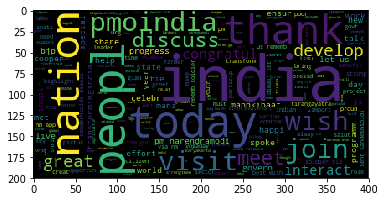

In [20]:
wc = WordCloud().generate(' '.join(doc_clean.values))
plt.imshow(wc)

# Hashtag Analysis

In [21]:
x = 'india'
x.startswith('#')

False

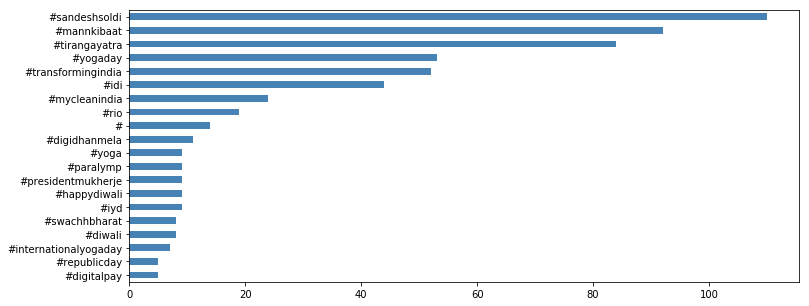

In [26]:
hashtags = []
for row in doc_clean:
    row_tags = [term for term in row.split(' ') if term.startswith('#')]
    if len(row_tags):
        hashtags.extend(row_tags)
hashtags = pd.Series(hashtags)
hashtags.value_counts().head(20)[::-1].plot.barh(color = 'steelblue', figsize=(12,5))

In [31]:
modi_data['date'] = pd.to_datetime(modi_data['created_at'])
modi_data['date'].head()

0   2017-01-31 11:00:07
1   2017-01-31 10:59:12
2   2017-01-31 10:52:33
3   2017-01-31 10:52:22
4   2017-01-31 10:52:16
Name: date, dtype: datetime64[ns]

In [34]:
modi_data['year_month'] = modi_data['date'].dt.strftime('%Y_%m')
modi_data['year_month'].head()

0    2017_01
1    2017_01
2    2017_01
3    2017_01
4    2017_01
Name: year_month, dtype: object

In [35]:
hashtag = '#mannkibaat'
modi_data['is_hashtag'] = doc_clean.str.contains(hashtag)

In [37]:
modi_data['is_hashtag'].value_counts()

False    3126
True       94
Name: is_hashtag, dtype: int64

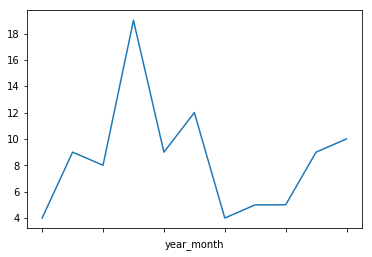

In [40]:
modi_data.groupby('year_month')['is_hashtag'].sum().plot.line(x =  'year_month')

# Document Term Matrix

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
dtm_func = CountVectorizer()
dtm_func.fit(doc_clean)
dtm_matrix = dtm_func.transform(doc_clean)
dtm_matrix

<3220x7340 sparse matrix of type '<class 'numpy.int64'>'
	with 31644 stored elements in Compressed Sparse Row format>

In [51]:
df_dtm = pd.DataFrame(dtm_matrix.toarray(), columns=dtm_func.get_feature_names())
df_dtm.shape

(3220, 7340)

1) Percentage of zeros in df_dtm

2) identify top 25 terms and vizualise using horizontal bar chart

3) Identify biggest review

In [52]:
df_dtm.head()

aabhar  aadhaar  aadhar  aajtak  aamirkhan  aanandmayi  aap  aawa  \
0       0        0       0       0          0           0    0     0   
1       0        0       0       0          0           0    0     0   
2       0        0       0       0          0           0    0     0   
3       0        0       0       0          0           0    0     0   
4       0        0       0       0          0           0    0     0   

   aazadisa  abdel  ...   yuvstrong  zaidi  zay  zeal  zero  zhejiang  ziara  \
0         0      0  ...           0      0    0     0     0         0      0   
1         0      0  ...           0      0    0     0     0         0      0   
2         0      0  ...           0      0    0     0     0         0      0   
3         0      0  ...           0      0    0     0     0         0      0   
4         0      0  ...           0      0    0     0     0         0      0   

   zimbabw  zone  zuma  
0        0     0     0  
1        0     0     0  
2        0     0     0  
3        0     0     0  
4        0     0     0  

[5 rows x 7340 columns]

In [55]:
(df_dtm == 0).sum().sum() / (df_dtm.shape[0] * df_dtm.shape[1]) * 100


99.86611268130045

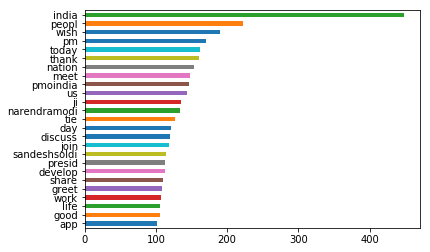

In [56]:
pt = df_dtm.sum().sort_values(ascending = False).head(25)[::-1].plot.barh()

In [57]:
df_dtm.sum(axis = 1).sort_values(ascending=False).head(1)

1421    24
dtype: int64

In [62]:
modi_data.loc[1421, 'text'][:100]

'Tôi sẽ luôn nhớ tới \u200b\u200bchuyến thăm đáng nhớ và hiệu quả này, \u200b\u200bchuyến thăm\u200b \u200b\u200bđặt nền tảng cho mối qu'

# Amazon Dataset

In [45]:
amazon = pd.read_csv('amazon_reviews_11.csv')
amazon.shape
amazon.head()

Unnamed: 0        asin   helpful  overall  \
0           0  0528881469    [0, 0]      5.0   
1           1  0528881469  [12, 15]      1.0   
2           2  0528881469  [43, 45]      3.0   
3           3  0528881469   [9, 10]      2.0   
4           4  0528881469    [0, 0]      1.0   

                                          reviewText   reviewTime  \
0  We got this GPS for my husband who is an (OTR)...   06 2, 2013   
1  I'm a professional OTR truck driver, and I bou...  11 25, 2010   
2  Well, what can I say.  I've had this unit in m...   09 9, 2010   
3  Not going to write a long review, even thought...  11 24, 2010   
4  I've had mine for a year and here's what we go...  09 29, 2011   

       reviewerID              reviewerName  \
0   AO94DHGC771SJ                   amazdnu   
1   AMO214LNFCEI4           Amazon Customer   
2  A3N7T0DY83Y4IG             C. A. Freeman   
3  A1H8PY3QHMQQA0  Dave M. Shaw "mack dave"   
4  A24EV6RXELQZ63               Wayne Smith   

                                  summary  unixReviewTime  
0                         Gotta have GPS!    1.370131e+09  
1                       Very Disappointed    1.290643e+09  
2                          1st impression    1.283990e+09  
3                 Great grafics, POOR GPS    1.290557e+09  
4  Major issues, only excuses for support    1.317254e+09

# Word Similarity

In [64]:
x = [1,2,3]
y = [1,2,3]

from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([x,y])

array([[1., 1.],
       [1., 1.]])

In [72]:
terms_similarity = pd.DataFrame(cosine_similarity(df_dtm.T), columns=df_dtm.columns, index = df_dtm.columns)

In [73]:
terms_similarity

aabhar  aadhaar  aadhar  aajtak  aamirkhan  \
aabhar                  1.000000      0.0     0.0     0.0        0.0   
aadhaar                 0.000000      1.0     0.0     0.0        0.0   
aadhar                  0.000000      0.0     1.0     0.0        0.0   
aajtak                  0.000000      0.0     0.0     1.0        0.0   
aamirkhan               0.000000      0.0     0.0     0.0        1.0   
aanandmayi              0.000000      0.0     0.0     0.0        0.0   
aap                     0.000000      0.0     0.0     0.0        0.0   
aawa                    0.000000      0.0     0.0     0.0        0.0   
aazadisa                0.000000      0.0     0.0     0.0        0.0   
abdel                   0.000000      0.0     0.0     0.0        0.0   
abduct                  0.000000      0.0     0.0     0.0        0.0   
abdul                   0.000000      0.0     0.0     0.0        0.0   
abdulaziz               0.000000      0.0     0.0     0.0        0.0   
abdulla                 0.000000      0.0     0.0     0.0        0.0   
abdullah                0.000000      0.0     0.0     0.0        0.0   
abe                     0.000000      0.0     0.0     0.0        0.0   
abeshinzo               0.000000      0.0     0.0     0.0        0.0   
abeshinzow              0.000000      0.0     0.0     0.0        0.0   
abhidecentguy           0.000000      0.0     0.0     0.0        0.0   
abhikr                  0.000000      0.0     0.0     0.0        0.0   
abhinavbindra           0.000000      0.0     0.0     0.0        0.0   
abhiyaan                0.000000      0.0     0.0     0.0        0.0   
abhiyan                 0.000000      0.0     0.0     0.0        0.0   
abil                    0.000000      0.0     0.0     0.0        0.0   
abl                     0.000000      0.0     0.0     0.0        0.0   
abpnewstv               0.000000      0.0     0.0     0.0        0.0   
abroad                  0.000000      0.0     0.0     0.0        0.0   
absolut                 0.000000      0.0     0.0     0.0        0.0   
abt                     0.000000      0.0     0.0     0.0        0.0   
abu                     0.000000      0.0     0.0     0.0        0.0   
...                          ...      ...     ...     ...        ...   
yogrishiramdev          0.333333      0.0     0.0     0.0        0.0   
yohannan                0.000000      0.0     0.0     0.0        0.0   
yojan                   0.000000      0.0     0.0     0.0        0.0   
yojana                  0.000000      0.0     0.0     0.0        0.0   
yojna                   0.000000      0.0     0.0     0.0        0.0   
york                    0.000000      0.0     0.0     0.0        0.0   
you                     0.000000      0.0     0.0     0.0        0.0   
youher                  0.000000      0.0     0.0     0.0        0.0   
youhttpstcoadqdjlkhz    0.000000      0.0     0.0     0.0        0.0   
young                   0.000000      0.0     0.0     0.0        0.0   
youngster               0.000000      0.0     0.0     0.0        0.0   
youth                   0.000000      0.0     0.0     0.0        0.0   
youthhttpstcokmxdtvaij  0.000000      0.0     0.0     0.0        0.0   
youthl                  0.000000      0.0     0.0     0.0        0.0   
youtub                  0.000000      0.0     0.0     0.0        0.0   
yr                      0.000000      0.0     0.0     0.0        0.0   
yschowdari              0.000000      0.0     0.0     0.0        0.0   
yudiz                   0.000000      0.0     0.0     0.0        0.0   
yukt                    0.000000      0.0     0.0     0.0        0.0   
yuva                    0.000000      0.0     0.0     0.0        0.0   
yuvstrong               0.000000      0.0     0.0     0.0        0.0   
zaidi                   0.000000      0.0     0.0     0.0        0.0   
zay                     0.000000      0.0     0.0     0.0        0.0   
zeal                    0.000000      0.0     0.0     0.0        0

In [74]:
terms_similarity['aadhar'].sort_values(ascending=False)

httpstcomqyosqu       1.000000
aadhar                1.000000
dbt                   0.500000
level                 0.316228
given                 0.316228
high                  0.223607
detail                0.223607
last                  0.185695
made                  0.171499
even                  0.171499
progress              0.111803
programm              0.104257
meet                  0.080582
httpstcoebqktcey      0.000000
httpstcodywovtuc      0.000000
httpstcodzaoueq       0.000000
httpstcodzaovfnc      0.000000
httpstcoeanzfiya      0.000000
httpstcoebuifc        0.000000
httpstcoeadovzl       0.000000
httpstcodzsorcvk      0.000000
httpstcodzhkwrt       0.000000
httpstcoeazspbmom     0.000000
zuma                  0.000000
httpstcoebwghln       0.000000
httpstcodyrntlxem     0.000000
httpstcoecmweghksn    0.000000
httpstcoecpumjlxr     0.000000
httpstcoecrthhx       0.000000
httpstcoeczkfbxqz     0.000000
                        ...   
multilater            0.000000
mourn   

# Bigrams and Trigrams

In [ ]:
bigram_dtm_func = CountVectorizer(ngram_range=(2,2))
bigram_dtm_func.fit(doc_clean)